In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# 1. Area chart

In [3]:
# Descarga datos stock market Microsoft
tcker = "MSFT"
stock_data = yf.download(tcker, start="2024-01-01", end="2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


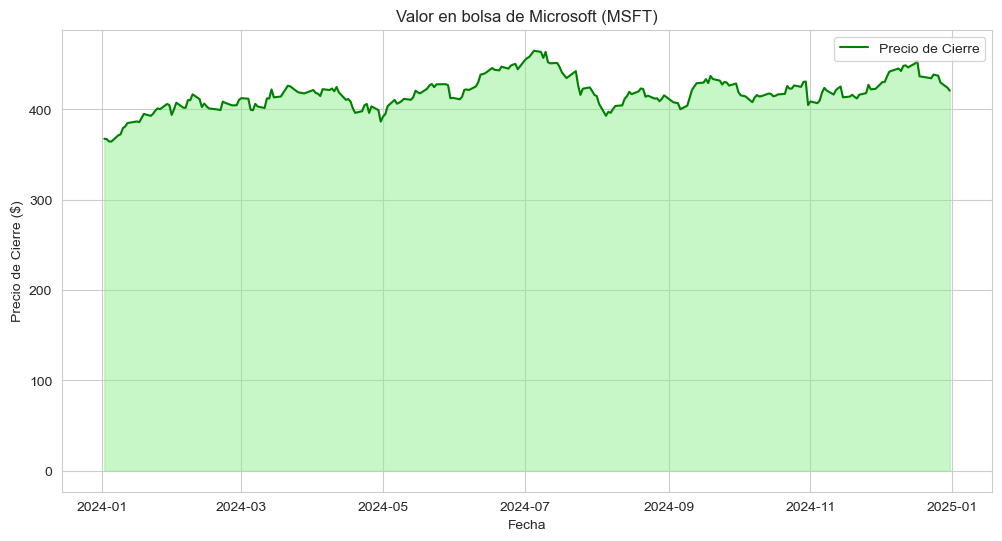

In [4]:
date = stock_data['Close'].reset_index().Date
close = stock_data['Close'].reset_index().MSFT

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=date, y=close, color="green", label="Precio de Cierre")
plt.fill_between(date, close, color="lightgreen", alpha=0.5)

plt.title("Valor en bolsa de Microsoft (MSFT)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre ($)")
plt.legend()
plt.show()

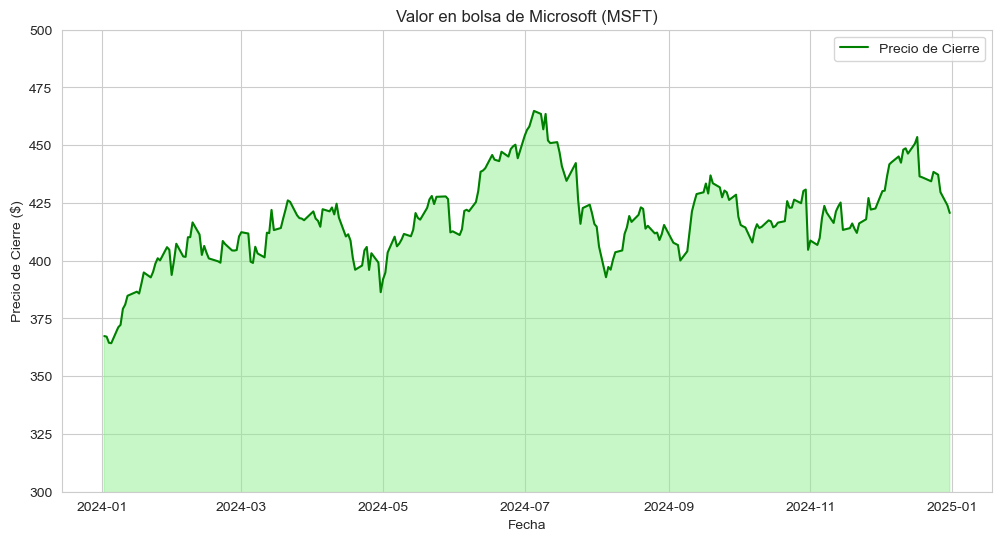

In [5]:
date = stock_data['Close'].reset_index().Date
close = stock_data['Close'].reset_index().MSFT

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=date, y=close, color="green", label="Precio de Cierre")
plt.fill_between(date, close, color="lightgreen", alpha=0.5)

plt.title("Valor en bolsa de Microsoft (MSFT)")
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre ($)")
plt.ylim(300,500)
plt.legend()
plt.show()


# 2. Parallel coordinates plot

In [6]:
from pandas.plotting import parallel_coordinates

In [7]:
df_nutrients = pd.read_csv("nutrients.csv")

group_list = ['Pork Products','Fruits and Fruit Juices','Baked Products','Fats and Oils']

df_nutrients = df_nutrients[df_nutrients.group.isin(group_list)]

def seleccionar_muestras(df):
    return df.sample(n=10, random_state=1)

df_nutrients_samp = df_nutrients.groupby('group', group_keys=False).apply(seleccionar_muestras)
df_nutrients_samp = df_nutrients_samp.reset_index(drop=True)

df_nutrients_samp.head()

,name,group,protein (g),calcium (g),sodium (g),fiber (g),vitaminc (g),potassium (g),carbohydrate (g),sugars (g),fat (g),water (g),calories,saturated (g),monounsat (g),polyunsat (g)
0,"NABISCO, NABISCO SNACKWELL'S Fat Free Devil's ...",Baked Products,5.00,0.030,0.174,1.6,0.0001,0.111,74.25,43.38,1.09,17.65,305,0.427,0.246,0.196
1,"Crackers, snack, GOYA CRACKERS",Baked Products,14.25,0.016,0.665,3.8,0.0000,0.124,64.35,2.35,13.35,5.93,433,6.323,4.697,1.536
2,"Pie crust, cookie-type, prepared from recipe, ...",Baked Products,3.70,0.042,0.515,0.1,0.0001,0.079,50.20,7.33,36.20,8.50,531,7.434,15.647,10.682
3,"Leavening agents, baking powder, low-sodium",Baked Products,0.10,4.332,0.090,2.2,0.0000,10.100,46.90,0.00,0.40,6.20,97,0.073,0.006,0.121
4,"Pie, fried pies, fruit",Baked Products,3.00,0.022,0.374,2.6,0.0013,0.065,42.60,21.40,16.10,37.60,316,2.457,7.449,5.376


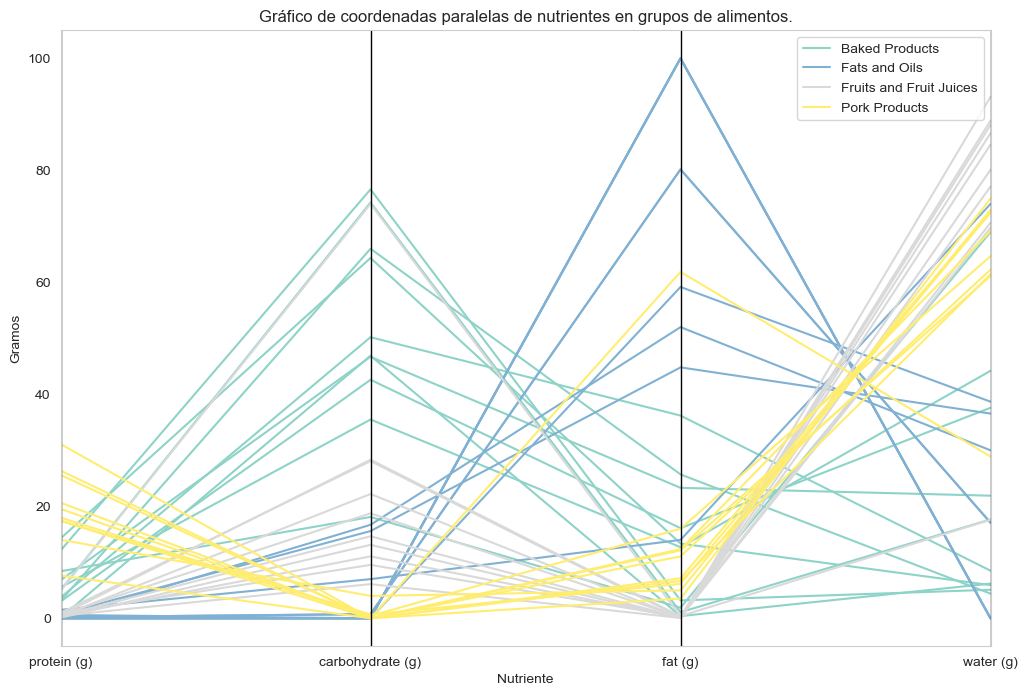

In [8]:
plt.figure(figsize=(12,8))
parallel_coordinates(df_nutrients_samp, 'group', cols = ['protein (g)','carbohydrate (g)','fat (g)','water (g)'], colormap=plt.get_cmap("Set3"))
plt.ylabel("Gramos")
plt.xlabel("Nutriente")
plt.title("Gráfico de coordenadas paralelas de nutrientes en grupos de alimentos.")
plt.show()

# 3. Horizon graph

In [42]:
df_weather = pd.read_csv("weatherHistory.csv")

df_weather['Formatted Date'] = pd.to_datetime(df_weather['Formatted Date'], errors='coerce', utc=True)

df_weather["year"] = df_weather["Formatted Date"].dt.year
df_weather["month"] = df_weather["Formatted Date"].dt.month
df_weather["day"] = df_weather["Formatted Date"].dt.dayofyear

In [43]:
df_weather = df_weather.groupby(['year', 'month', 'day'])['Temperature (C)'].mean().reset_index()

df_weather = df_weather[df_weather.year < 2016]
df_weather = df_weather[df_weather.year > 2006]

df_weather = df_weather.rename(columns={'day':'x', 'Temperature (C)':'y'})

In [56]:
import altair as alt

# Área positiva débil
area_pos1 = alt.Chart(df_weather).mark_area(
    clip=True,
    interpolate='monotone',
    opacity=0.6,
    color='lightcoral'
).encode(
    x='x:Q',
    y=alt.Y('pos1:Q', title=None).scale(domain=[0, 15])
).transform_calculate(
    pos1='min(15, max(0, datum.y))'
)

# Área positiva fuerte
area_pos2 = alt.Chart(df_weather).mark_area(
    clip=True,
    interpolate='monotone',
    opacity=0.6,
    color='red'
).encode(
    x='x:Q',
    y=alt.Y('pos2:Q').scale(domain=[0, 15])
).transform_calculate(
    pos2='max(0, datum.y - 15)'
)

# Área negativa
area_neg1 = alt.Chart(df_weather).mark_area(
    clip=True,
    interpolate='monotone',
    opacity=0.6,
    color='lightblue'
).encode(
    x=alt.X('x:Q', title='Día del año'),
    y=alt.Y('neg1:Q').scale(domain=[0, 15])
).transform_calculate(
    neg1='datum.y < 0 ? -datum.y : null'
)

horizon_chart = (area_pos1 + area_pos2 + area_neg1).properties(
    width=900,
    height=100,
).facet(
    row='year:O'
).properties(
    title="Gráfico de horizonte de temperaturas por año"
).configure_title(
    fontSize=20,
    anchor='middle',
)

horizon_chart



alt.FacetChart(...)